<a href="https://colab.research.google.com/github/ksBrose/3DSGroup_BootcampDataScience/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Data Science - Grupo 3DS

Foram baixados primeiramente os arquivos de dados telemétricos das cidades de Encantado, Muçum e Santa Tereza, no período de 01/08/2023 a 31/10/2023.
Para o município de Santa Tereza, foram baixados dados de 2 estações: Santa Tereza e Linha José Julio.

**Sites Referencia**
- https://www.snirh.gov.br/hidroweb/mapa
- https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

In [38]:
df_Encantado = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86720000-ENCANTADO.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86510000-MUCUM.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472600-SANTA%20TEREZA.csv', encoding='ISO-8859-1', delimiter=';')
df_Lin_JJ = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472000-LINHA%20JOSE%20JULIO.csv', encoding='ISO-8859-1', delimiter=';')

In [39]:
df_Encantado24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Encantado23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')

In [40]:
df_Encantado24.head()

,Data/Hora,Chuva(mm),Nivel(cm),Vazao(m3/s),Bateria(V),TempInt(C)
0,23/10/2024 15:00,0.0,100.0,0.11,28.6,22.9
1,23/10/2024 14:45,0.0,100.0,0.11,28.9,22.9
2,23/10/2024 14:30,0.0,100.0,0.11,29.1,22.9
3,23/10/2024 14:15,0.0,99.0,NaN,29.4,22.9
4,23/10/2024 14:00,0.0,99.0,NaN,29.8,22.9


In [41]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data/Hora    35124 non-null  object 
 1   Chuva(mm)    34991 non-null  float64
 2   Nivel(cm)    25415 non-null  float64
 3   Vazao(m3/s)  26309 non-null  float64
 4   Bateria(V)   35118 non-null  float64
 5   TempInt(C)   35023 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


- Alterar Dtype Data/Hora para variavel datetime

In [51]:
df_Encantado24['Data/Hora'] = pd.to_datetime(df_Encantado24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado23['Data/Hora'] = pd.to_datetime(df_Encantado23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum24['Data/Hora'] = pd.to_datetime(df_Mucum24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum23['Data/Hora'] = pd.to_datetime(df_Mucum23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza24['Data/Hora'] = pd.to_datetime(df_Sta_Tereza24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza23['Data/Hora'] = pd.to_datetime(df_Sta_Tereza23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio24['Data/Hora'] = pd.to_datetime(df_Jose_Julio24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio23['Data/Hora'] = pd.to_datetime(df_Jose_Julio23['Data/Hora'], format='%d/%m/%Y %H:%M')

In [52]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    35124 non-null  datetime64[ns]
 1   Chuva(mm)    34991 non-null  float64       
 2   Nivel(cm)    25415 non-null  float64       
 3   Vazao(m3/s)  26309 non-null  float64       
 4   Bateria(V)   35118 non-null  float64       
 5   TempInt(C)   35023 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.6 MB


In [43]:
df_Encantado['Data_Hora'] = pd.to_datetime(df_Encantado['Data'] + ' ' + df_Encantado['Hora'], format='%d/%m/%Y %H:%M:%S')
df_Encantado.info()

Text(0, 0.5, 'Nivel')

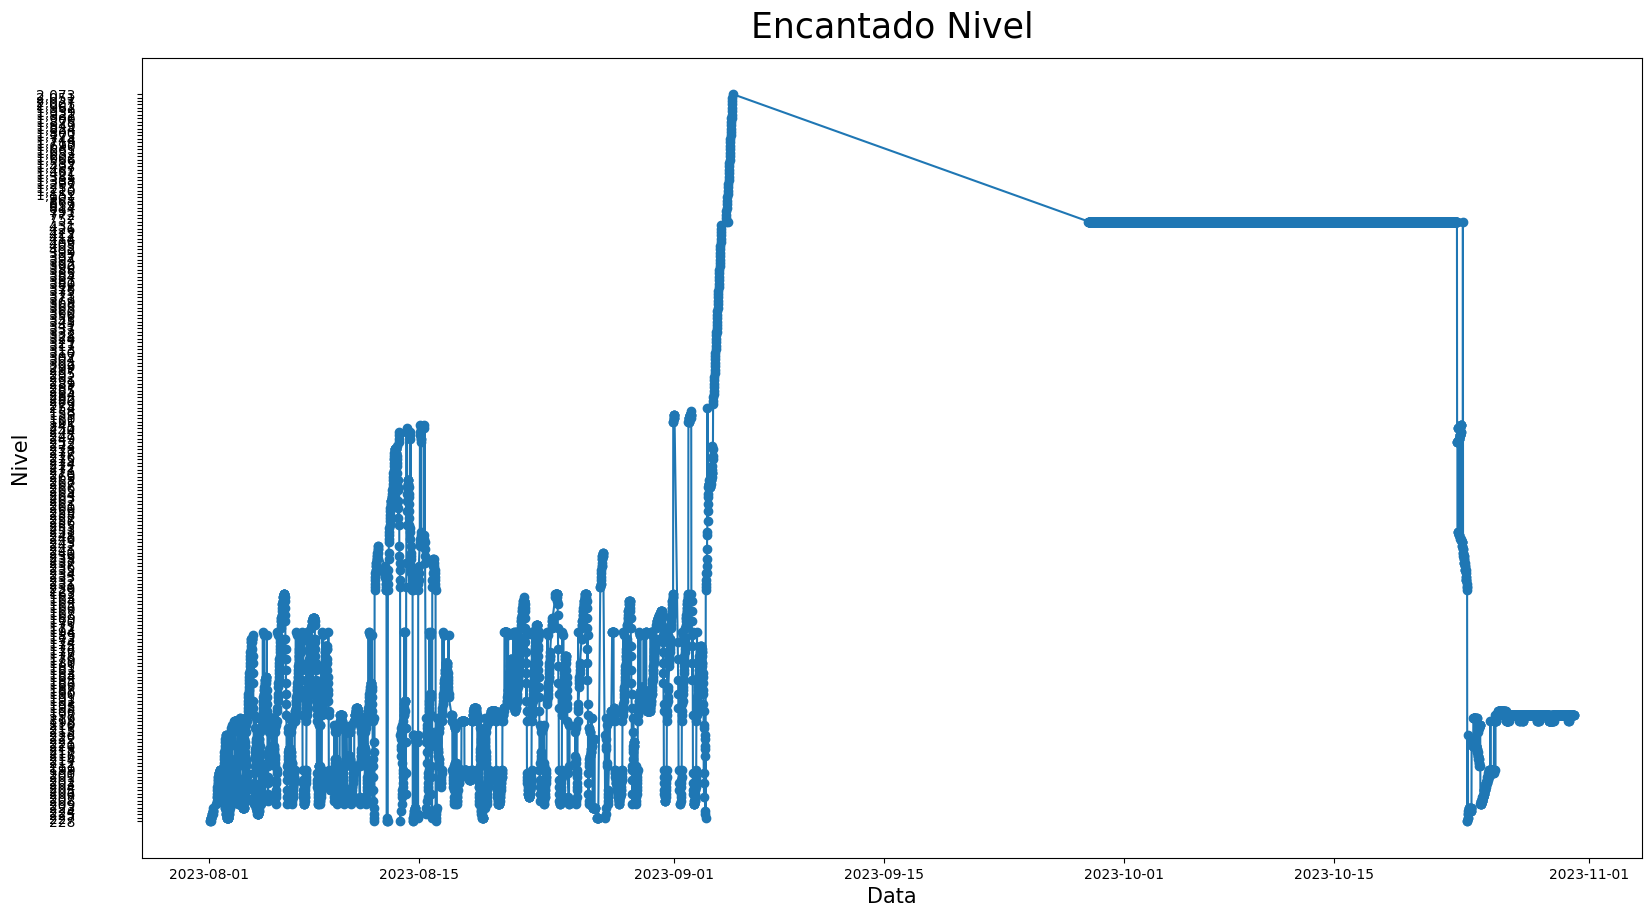

In [47]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

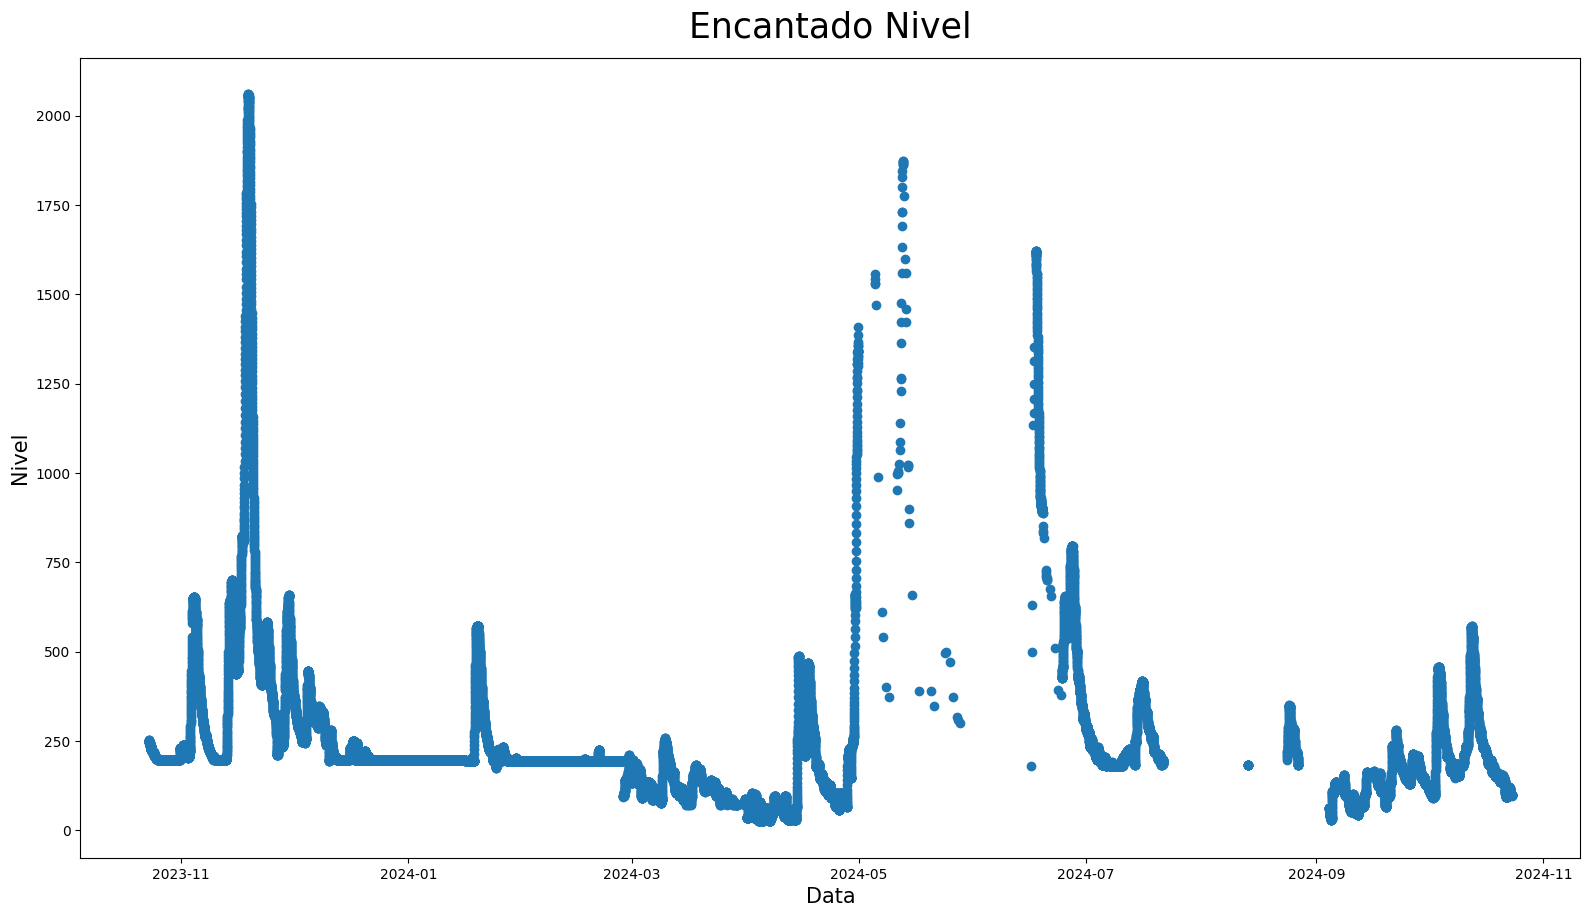

In [49]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado24['Data/Hora'], df_Encantado24['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

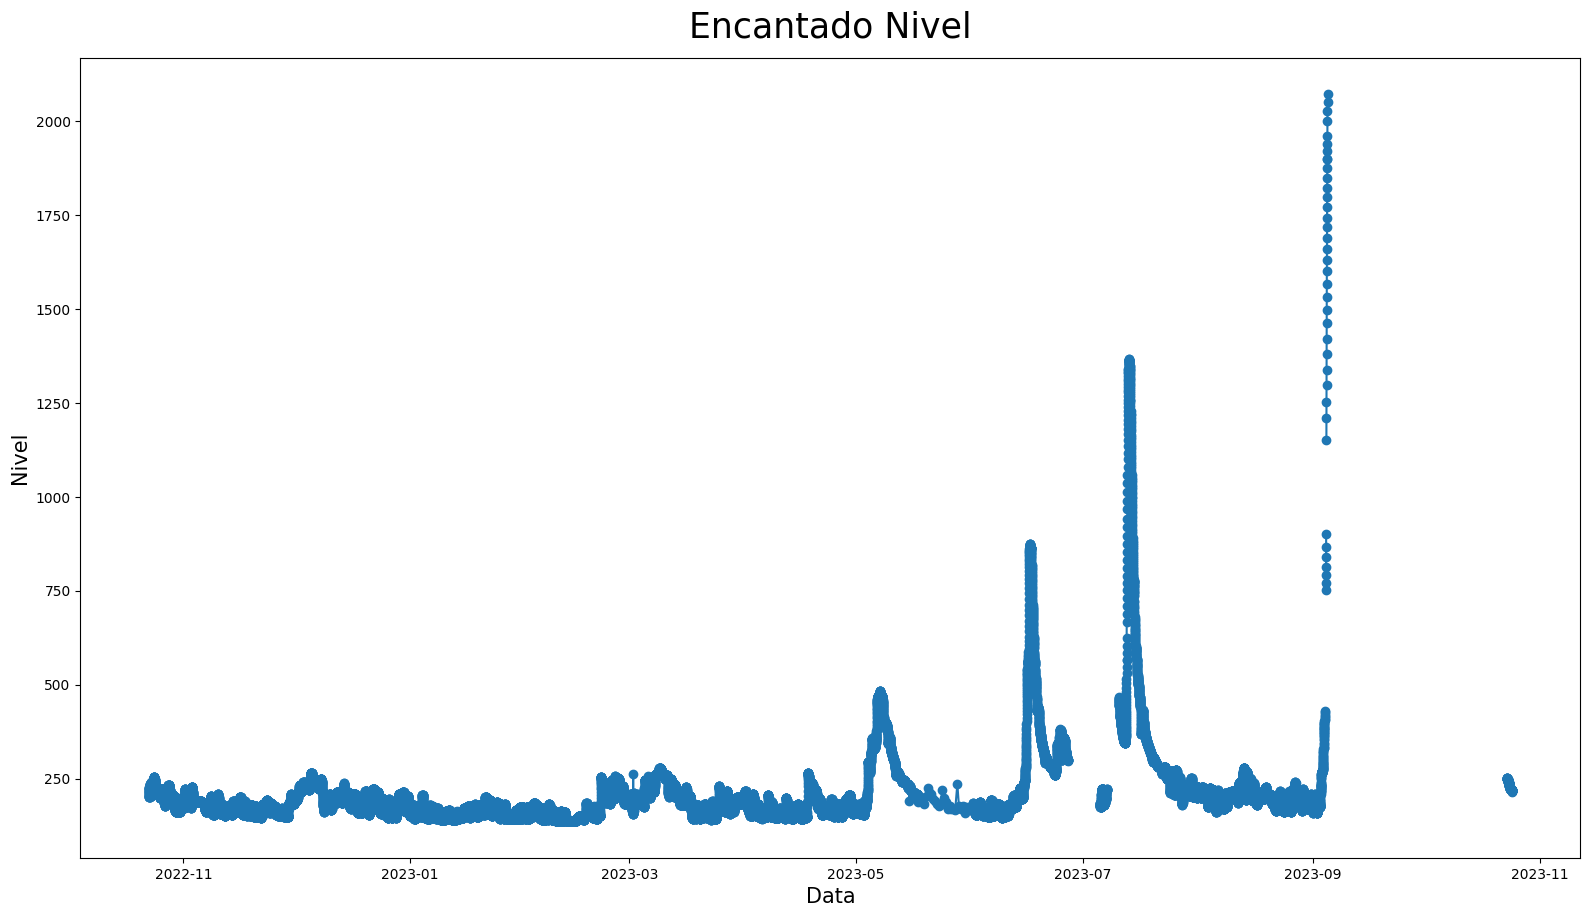

In [53]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado23['Data/Hora'], df_Encantado23['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

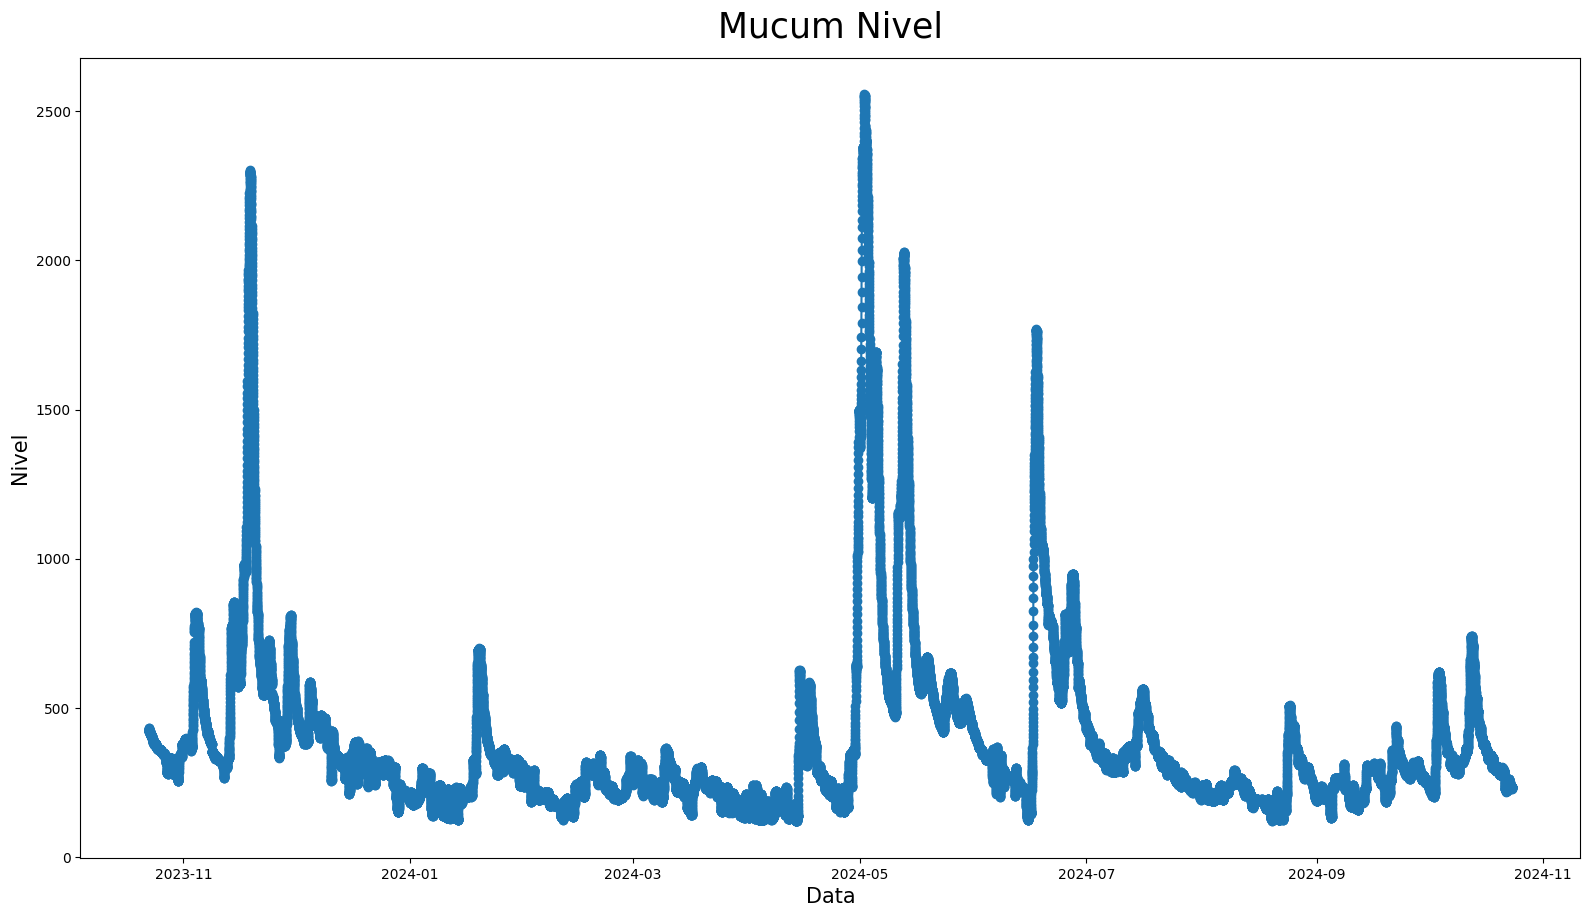

In [54]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Mucum24['Data/Hora'], df_Mucum24['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Mucum Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

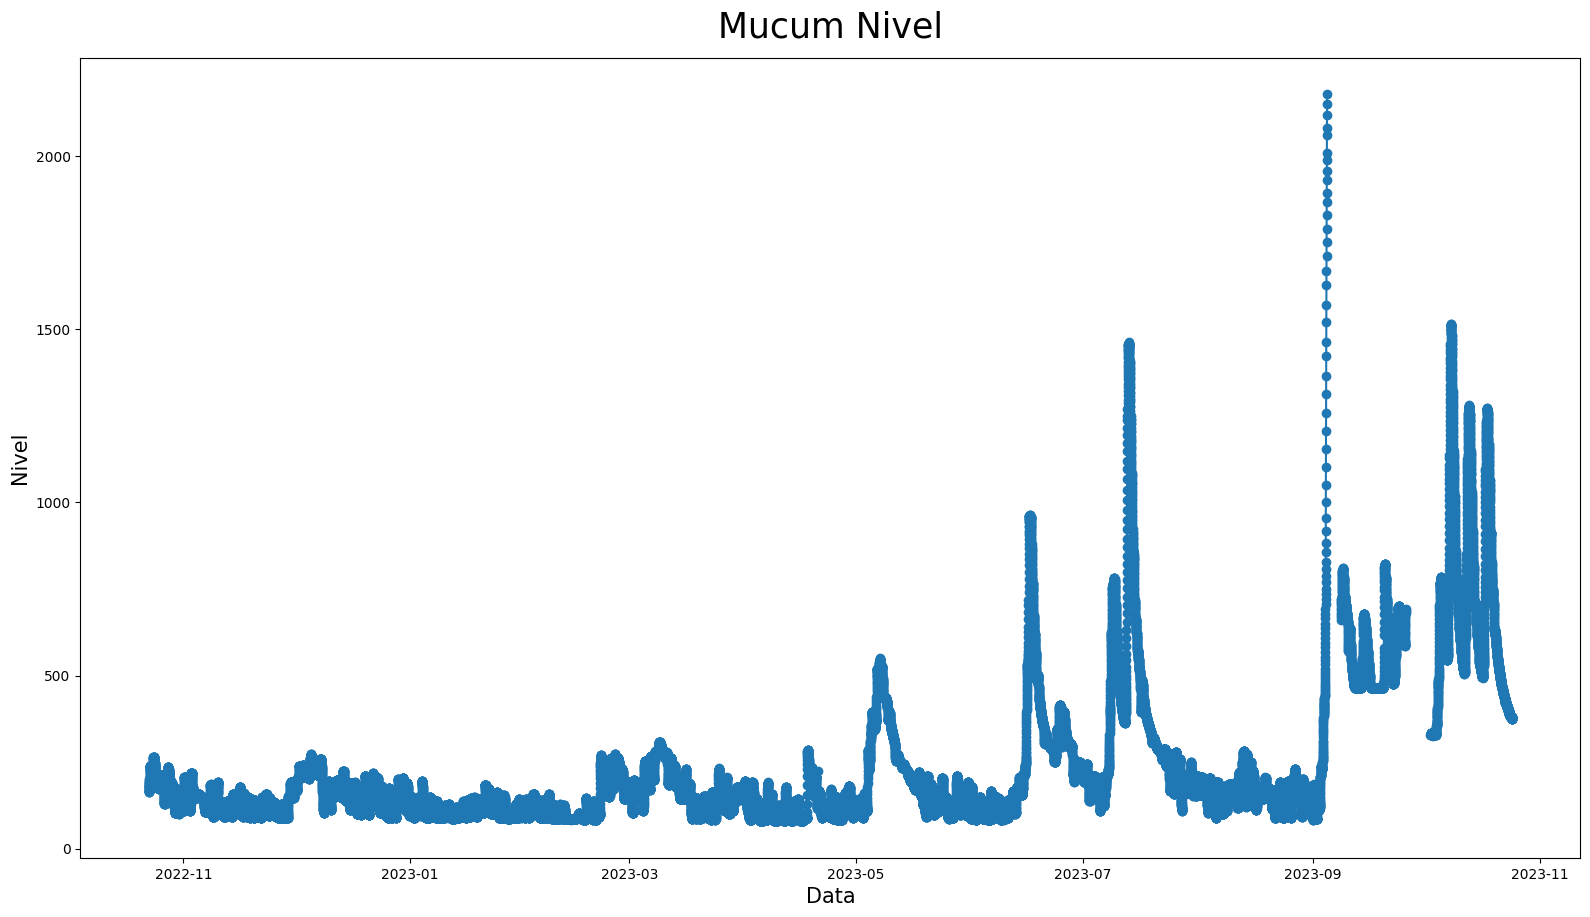

In [55]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Mucum23['Data/Hora'], df_Mucum23['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Mucum Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

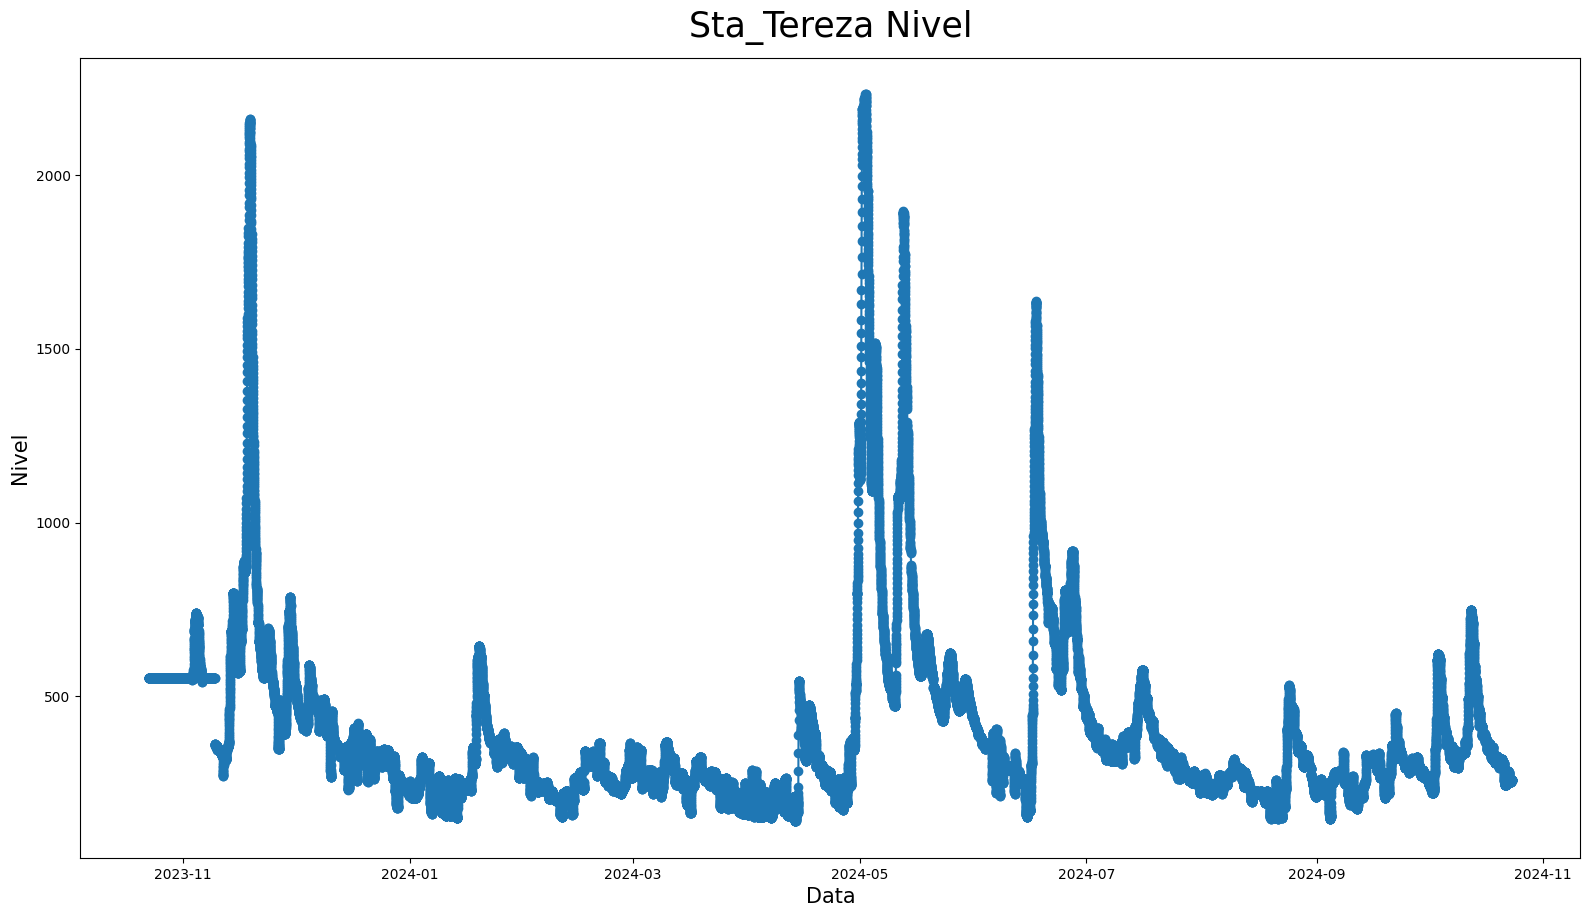

In [56]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Sta_Tereza24['Data/Hora'], df_Sta_Tereza24['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Sta_Tereza Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

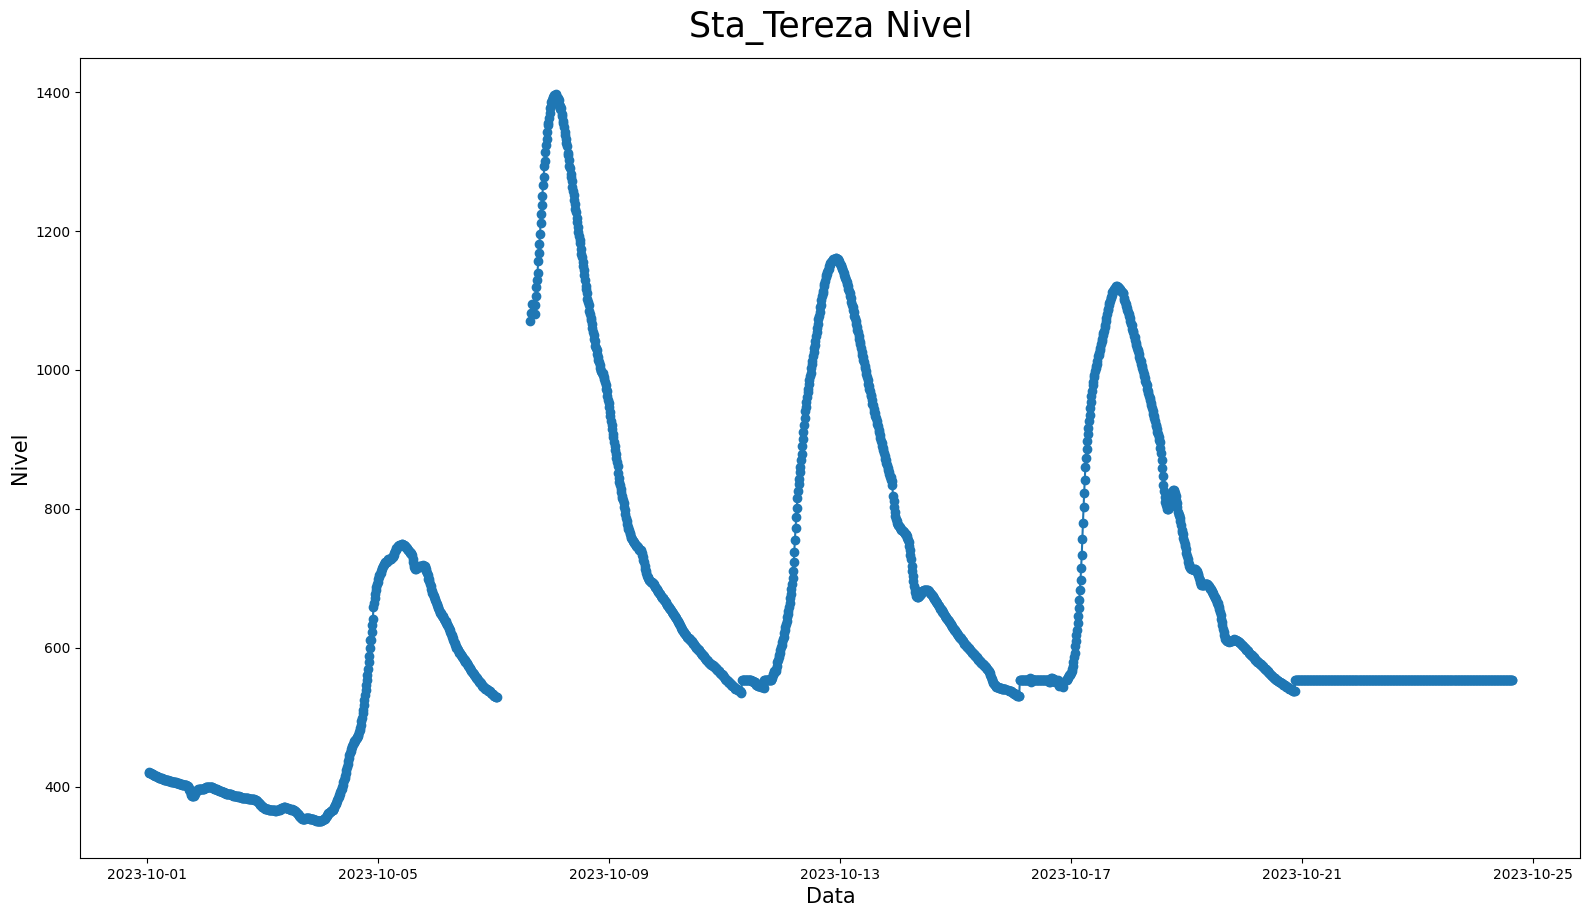

In [57]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Sta_Tereza23['Data/Hora'], df_Sta_Tereza23['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Sta_Tereza Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

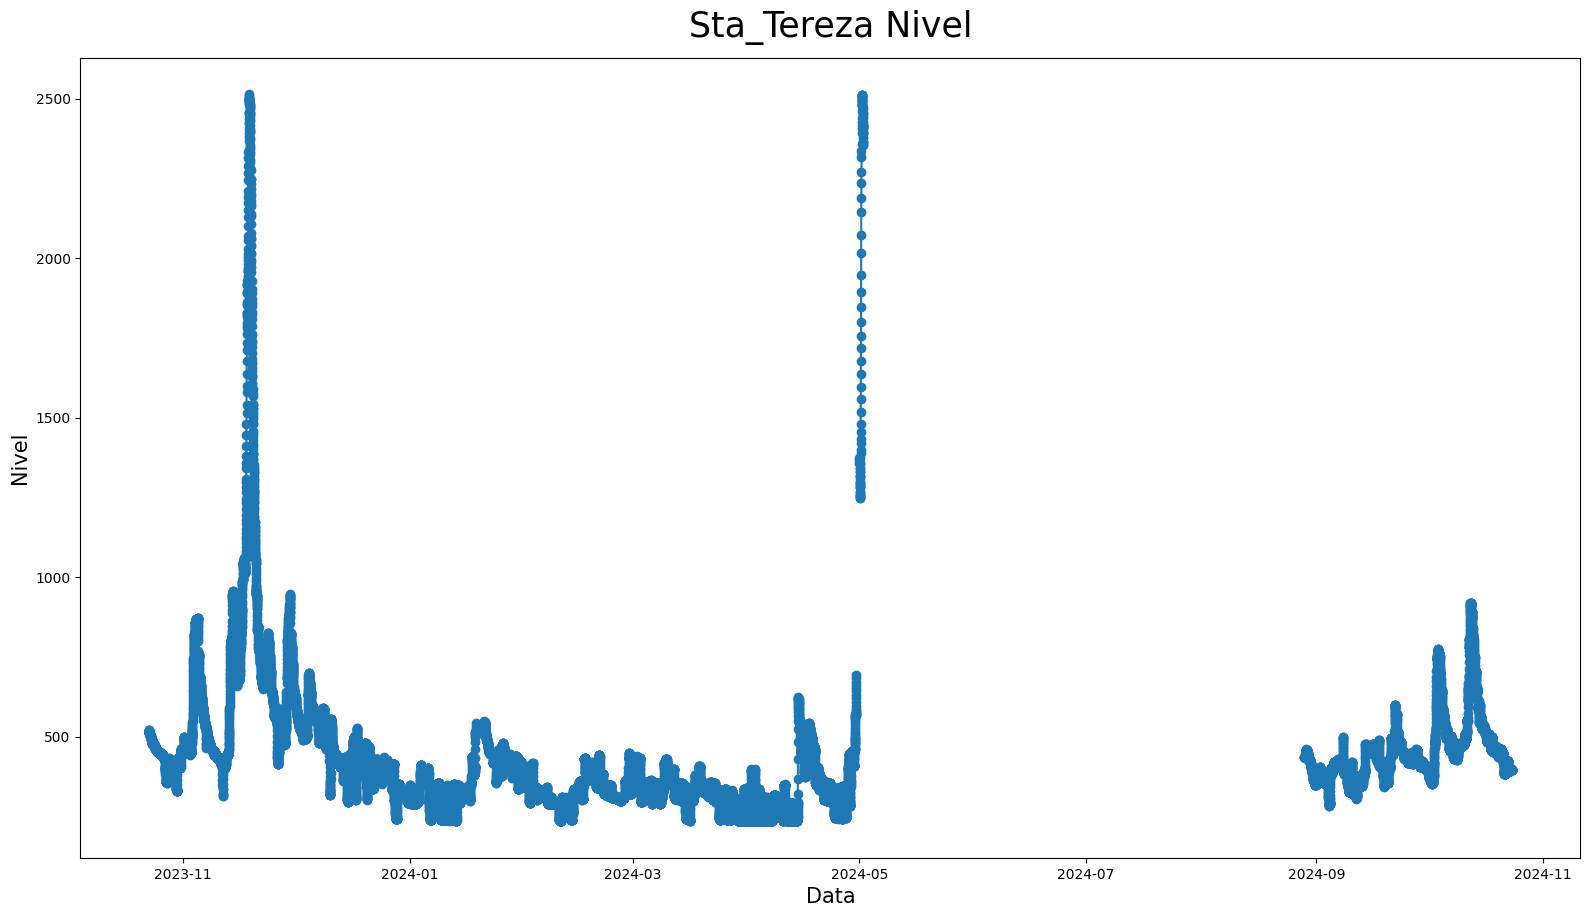

In [58]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Jose_Julio24['Data/Hora'], df_Jose_Julio24['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Sta_Tereza Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

Text(0, 0.5, 'Nivel')

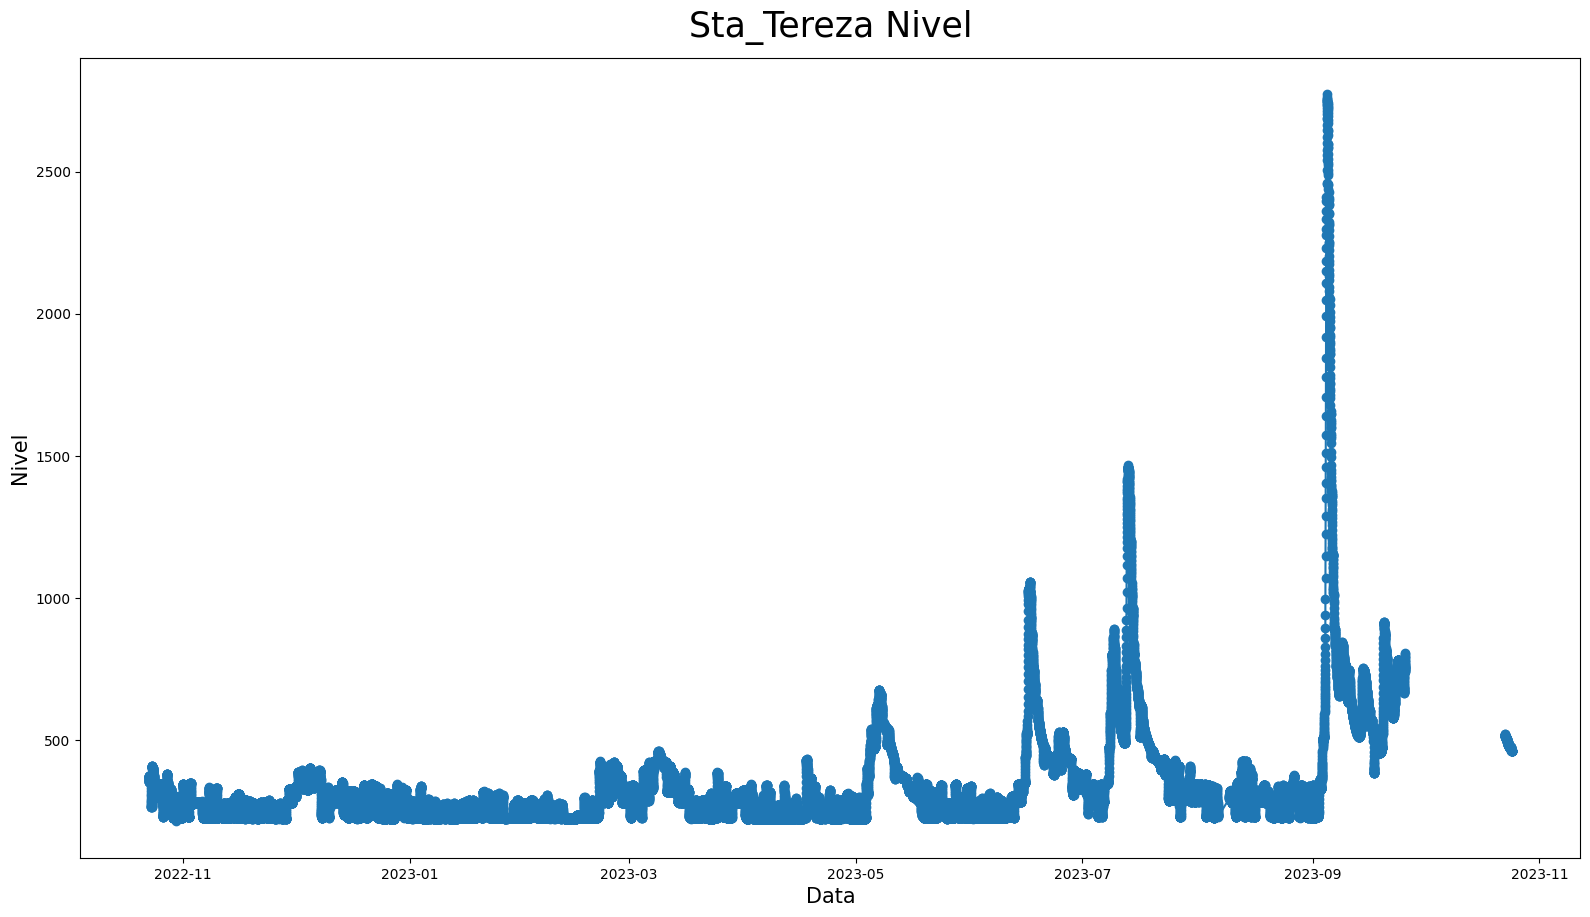

In [59]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])


eixo.plot(df_Jose_Julio23['Data/Hora'], df_Jose_Julio23['Nivel(cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Sta_Tereza Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)